In [9]:
# Image to Txt file 
import os
from easyocr import Reader

# Define the path to the folder containing the images
image_folder = r'C:\Users\aarya\Desktop\ML\Aaryan MLProject\Image Data'

# Function to extract text from an image
def extract_text_from_image(image_path):
    try:
        # Initialize the EasyOCR reader
        reader = Reader(['en'])  # You can specify additional languages if needed

        # Perform OCR on the image
        result = reader.readtext(image_path)

        # Extract text from the OCR result
        text = ' '.join([entry[1] for entry in result])

        return text
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return ""

# Function to iterate through images in a folder and extract text
def extract_text_from_images_in_folder(folder_path, output_file_path):
    with open(output_file_path, 'w', encoding='utf-8') as text_file:
        for filename in os.listdir(folder_path):
            if filename.endswith('.jpeg') or filename.endswith('.jpg'):
                image_path = os.path.join(folder_path, filename)
                text = extract_text_from_image(image_path)
                text_file.write(f"{text}\n\n")

# Path to save the text file with .txt extension for Notepad
text_file_path = os.path.join(image_folder, 'Output_From_Image.txt')

# Extract text from images in the specified folder and save to a text file
extract_text_from_images_in_folder(image_folder, text_file_path)

print(f"Converted to {text_file_path}")


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Converted to C:\Users\aarya\Desktop\ML\Aaryan MLProject\Image Data\Output_From_Image.txt


In [ ]:
# new

In [ ]:
Gpt 2

In [ ]:
#word file Image

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aarya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


You:  machine learning


Extracted keywords: ['machine learning']
Displaying image for Machine learning:


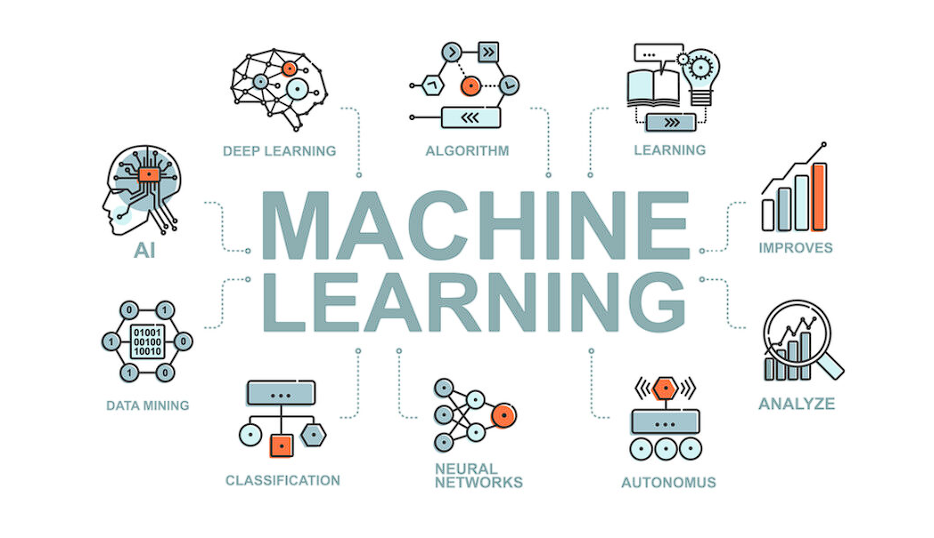

CHATBOT: Information about Machine learning:
=== Learning ===
Machine learning is the study of programs that can improve their performance on a given task automatically. It has been a part of AI from the beginning. There are several kinds of machine learning. Unsupervised learning analyzes a stream of data and finds patterns and makes predictions without any other guidance. Supervised learning requires a human to label the input data first, and comes in two main varieties: classification (where the program must learn to predict what category the input belongs in) and regression (where the program must deduce a numeric function based on numeric input). In reinforcement learning the agent is rewarded for good responses and punished for bad ones. The agent learns to choose responses that are classified as "good". Transfer learning is when the knowledge gained from one problem is applied to a new problem. Deep learning is a type of machine learning that runs inputs through biologically ins

You:  Data Science


Extracted keywords: ['data science']
Displaying image for Data Science:


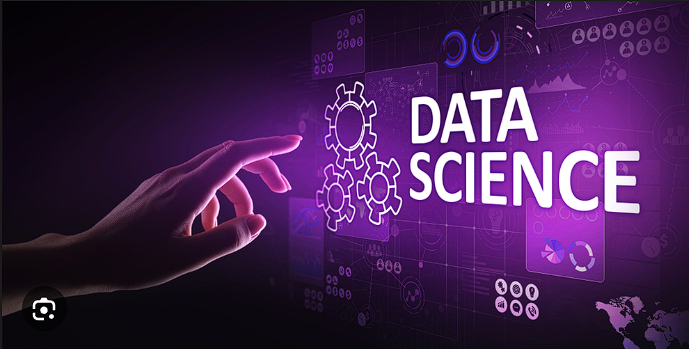

CHATBOT: Information about Data science:
Data science is an interdisciplinary academic field that uses statistics, scientific computing, scientific methods, processes, algorithms and systems to extract or extrapolate knowledge and insights from potentially noisy, structured, or unstructured data. Data science also integrates domain knowledge from the underlying application domain (e.g., natural sciences, information technology, and medicine). Data science is multifaceted and can be described as a science, a research paradigm, a research method, a discipline, a workflow, and a profession. Data science is "a concept to unify statistics, data analysis, informatics, and their related methods" to "understand and analyze actual phenomena" with data. It uses techniques and theories drawn from many fields within the context of mathematics, statistics, computer science, information science, and domain knowledge. However, data science is different from computer science and information science. A

You:  exit


In [20]:
import os
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from transformers import GPT2Tokenizer, GPT2LMHeadModel
from docx import Document
from io import BytesIO
from IPython.display import Image, display

# Ensure necessary NLTK resources are downloaded
def ensure_nltk_resources():
    try:
        nltk.data.find('tokenizers/punkt')
    except LookupError:
        nltk.download('punkt')
    try:
        nltk.data.find('corpora/stopwords')
    except LookupError:
        nltk.download('stopwords')
    try:
        nltk.data.find('corpora/wordnet')
    except LookupError:
        nltk.download('wordnet')

ensure_nltk_resources()

# Function to preprocess text
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token.isalnum()]
    tokens = [token for token in tokens if token not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

# Function to extract keywords from questions
def extract_keywords(question):
    patterns = [
        r'what\s+is\s+([\w\s]+)\b',
        r'what\s+are\s+([\w\s]+)\b',
        r'explain\s+([\w\s]+)\b',
        r'what\s+does\s+([\w\s]+)\s+mean\b',
        r'define\s+([\w\s]+)\b',
        r'can\s+you\s+tell\s+me\s+about\s+([\w\s]+)\b',
        r'how\s+does\s+([\w\s]+)\s+work\b',
        r'describe\s+([\w\s]+)\b',
        r'difference\s+between\s+([\w\s]+)\s+and\s+([\w\s]+)\b',
        r'([\w\s]+)\b\?'
    ]

    keywords = []
    for pattern in patterns:
        match = re.search(pattern, question, re.IGNORECASE)
        if match:
            if len(match.groups()) == 1:
                keywords.append(match.group(1).strip())
            elif len(match.groups()) > 1:
                keywords.extend([match.group(i).strip() for i in range(1, len(match.groups()) + 1)])
            break

    if not keywords:
        keywords = [' '.join(token for token in word_tokenize(question.lower()) if token.isalnum() and token not in stopwords.words('english'))]

    return keywords

# Read all text files in all subfolders and concatenate their contents
def read_all_text_files(main_folder_path):
    all_text = ""
    for root, dirs, files in os.walk(main_folder_path):
        for filename in files:
            if filename.endswith('.txt'):
                file_path = os.path.join(root, filename)
                with open(file_path, 'r', encoding='utf-8') as file:
                    all_text += file.read() + "\n"
    return all_text

# Function to get relevant information based on keywords
def get_relevant_info(keywords, data, max_words=200):
    relevant_info = {}
    sections = re.split(r'\n\s*\n', data.strip())
    
    for section in sections:
        for keyword in keywords:
            if keyword.lower() in section.lower():
                if keyword in relevant_info:
                    current_text = relevant_info[keyword]
                else:
                    current_text = ""

                sentences = sent_tokenize(section)
                current_words = len(word_tokenize(current_text))
                
                for sentence in sentences:
                    if current_words + len(word_tokenize(sentence)) <= max_words:
                        current_text += " " + sentence
                        current_words += len(word_tokenize(sentence))
                    else:
                        break
                
                # Ensure we capture until the end of the sentence (full stop)
                if len(current_text.split()) < max_words:
                    last_sentence = sentences[current_words - len(word_tokenize(current_text)) - 1]
                    if '.' in last_sentence:
                        current_text += " " + last_sentence.split('.')[0] + "."
                
                relevant_info[keyword] = current_text.strip()
    
    return relevant_info


# Load GPT-2 tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2')

# Function to generate a response using GPT-2
def generate_response(prompt):
    inputs = tokenizer.encode(prompt, return_tensors='pt')
    max_length = min(len(inputs[0]) + 100, 512)  # Limit max length to keep response concise
    outputs = model.generate(inputs, max_length=max_length, num_return_sequences=1, no_repeat_ngram_size=2, pad_token_id=tokenizer.eos_token_id)
    response = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return response.strip()

# Function to extract title and image from a Word document
def extract_docx_details(docx_file):
    document = Document(docx_file)
    details = {}

    paragraphs = document.paragraphs
    for i in range(len(paragraphs) - 1):
        if paragraphs[i].text.strip():
            title = paragraphs[i].text.strip()
            next_paragraph = paragraphs[i + 1]
            for run in next_paragraph.runs:
                for drawing in run.element.findall('.//{http://schemas.openxmlformats.org/drawingml/2006/main}blip'):
                    rId = drawing.get('{http://schemas.openxmlformats.org/officeDocument/2006/relationships}embed')
                    image_part = document.part.rels[rId].target_part
                    image_stream = BytesIO(image_part.blob)
                    details[title] = image_stream
    return details

# Function to display an image
def display_image(image_stream):
    display(Image(data=image_stream.read()))

# Main function
def main():
    main_folder_path = r"C:\Users\aarya\Desktop\ML\Aaryan MLProject"
    docx_file_path = r"C:\Users\aarya\Desktop\ML\Aaryan MLProject\Word data\Word file.docx"  # Provide the full path to your .docx file

    data = read_all_text_files(main_folder_path)
    docx_details = extract_docx_details(docx_file_path)

    while True:
        user_input = input("You: ")
        if user_input.lower() == 'exit':
            break

        keywords = extract_keywords(user_input)
        print(f"Extracted keywords: {keywords}")
        
        # Display images related to keywords
        for keyword in keywords:
            keyword_lower = keyword.lower()
            for title, image_stream in docx_details.items():
                if keyword_lower in title.lower():
                    print(f"\033[1mDisplaying image for {title}:\033[0m")
                    display_image(image_stream)
                    break  # Only display the first matching image

        # Attempt to find relevant information in the text data
        relevant_info = get_relevant_info(keywords, data, max_words=200)

        if relevant_info:
            for keyword, info in relevant_info.items():
                print(f"\033[1mCHATBOT: Information about {keyword.capitalize()}\033[0m:\n{info}\n")
        else:
            response = generate_response(
                f"The user asked: {user_input}\nBot: Sorry, I couldn't find information related to your query.")
            print("\033[1mBot:\033[0m", response)

        print("-------------------------------------------------------------------------------------------------------------------------------------------")

if __name__ == "__main__":
    main()


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aarya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\aarya\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


You:  what is data science ?


Extracted keywords: ['data science']
Displaying image for Data Science:


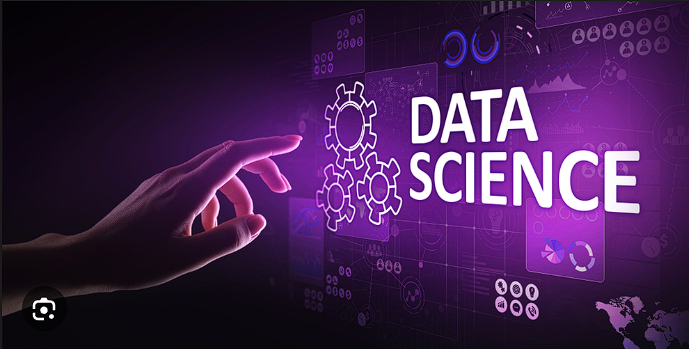

CHATBOT: Information about Data science:
Data science is an interdisciplinary academic field that uses statistics, scientific computing, scientific methods, processes, algorithms and systems to extract or extrapolate knowledge and insights from potentially noisy, structured, or unstructured data. Data science also integrates domain knowledge from the underlying application domain (e.g., natural sciences, information technology, and medicine). Data science is multifaceted and can be described as a science, a research paradigm, a research method, a discipline, a workflow, and a profession. Data science is "a concept to unify statistics, data analysis, informatics, and their related methods" to "understand and analyze actual phenomena" with data. It uses techniques and theories drawn from many fields within the context of mathematics, statistics, computer science, information science, and domain knowledge. However, data science is different from computer science and information science. A

You:  interdisciplinary academic field


Extracted keywords: ['interdisciplinary academic field']
CHATBOT: Information about Interdisciplinary academic field:
Data science is an interdisciplinary academic field that uses statistics, scientific computing, scientific methods, processes, algorithms and systems to extract or extrapolate knowledge and insights from potentially noisy, structured, or unstructured data. Data science also integrates domain knowledge from the underlying application domain (e.g., natural sciences, information technology, and medicine). Data science is multifaceted and can be described as a science, a research paradigm, a research method, a discipline, a workflow, and a profession. Data science is "a concept to unify statistics, data analysis, informatics, and their related methods" to "understand and analyze actual phenomena" with data. It uses techniques and theories drawn from many fields within the context of mathematics, statistics, computer science, information science, and domain knowledge. Howeve

You:  natural sciences


Extracted keywords: ['natural sciences']
CHATBOT: Information about Natural sciences:
Biogeography
Biogeography (an amalgamation of biology and geography) is the comparative study of the geographic distribution of organisms and the corresponding evolution of their traits in space and time. The Journal of Biogeography was established in 1974. Biogeography and ecology share many of their disciplinary roots. For example, the theory of island biogeography, published by the Robert MacArthur and Edward O. Wilson in 1967 is considered one of the fundamentals of ecological theory. Biogeography has a long history in the natural sciences concerning the spatial distribution of plants and animals. Ecology and evolution provide the explanatory context for biogeographical studies. Biogeographical patterns result from ecological processes that influence range distributions, such as migration and dispersal. and from historical processes that split populations or species into different areas. The bioge

You:  1974


Extracted keywords: ['1974']
CHATBOT: Information about 1974:
Biogeography
Biogeography (an amalgamation of biology and geography) is the comparative study of the geographic distribution of organisms and the corresponding evolution of their traits in space and time. The Journal of Biogeography was established in 1974. Biogeography and ecology share many of their disciplinary roots. For example, the theory of island biogeography, published by the Robert MacArthur and Edward O. Wilson in 1967 is considered one of the fundamentals of ecological theory. Biogeography has a long history in the natural sciences concerning the spatial distribution of plants and animals. Ecology and evolution provide the explanatory context for biogeographical studies. Biogeographical patterns result from ecological processes that influence range distributions, such as migration and dispersal. and from historical processes that split populations or species into different areas. The biogeographic processes that 

You:  exit


In [1]:
import os
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from transformers import GPT2Tokenizer, GPT2LMHeadModel
from docx import Document
from io import BytesIO
from IPython.display import Image, display
import collections

# Ensure necessary NLTK resources are downloaded
def ensure_nltk_resources():
    try:
        nltk.data.find('tokenizers/punkt')
    except LookupError:
        nltk.download('punkt')
    try:
        nltk.data.find('corpora/stopwords')
    except LookupError:
        nltk.download('stopwords')
    try:
        nltk.data.find('corpora/wordnet')
    except LookupError:
        nltk.download('wordnet')

ensure_nltk_resources()

# Function to preprocess text
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token.isalnum()]
    tokens = [token for token in tokens if token not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

# Function to extract keywords from questions
def extract_keywords(question):
    patterns = [
        r'what\s+is\s+([\w\s]+)\b',
        r'what\s+are\s+([\w\s]+)\b',
        r'explain\s+([\w\s]+)\b',
        r'what\s+does\s+([\w\s]+)\s+mean\b',
        r'define\s+([\w\s]+)\b',
        r'can\s+you\s+tell\s+me\s+about\s+([\w\s]+)\b',
        r'how\s+does\s+([\w\s]+)\s+work\b',
        r'describe\s+([\w\s]+)\b',
        r'difference\s+between\s+([\w\s]+)\s+and\s+([\w\s]+)\b',
        r'([\w\s]+)\b\?'
    ]

    keywords = []
    for pattern in patterns:
        match = re.search(pattern, question, re.IGNORECASE)
        if match:
            if len(match.groups()) == 1:
                keywords.append(match.group(1).strip())
            elif len(match.groups()) > 1:
                keywords.extend([match.group(i).strip() for i in range(1, len(match.groups()) + 1)])
            break

    if not keywords:
        keywords = [' '.join(token for token in word_tokenize(question.lower()) if token.isalnum() and token not in stopwords.words('english'))]

    return keywords

# Read all text files in all subfolders and concatenate their contents
def read_all_text_files(main_folder_path):
    all_text = ""
    for root, dirs, files in os.walk(main_folder_path):
        for filename in files:
            if filename.endswith('.txt'):
                file_path = os.path.join(root, filename)
                with open(file_path, 'r', encoding='utf-8') as file:
                    all_text += file.read() + "\n"
    return all_text

# Function to get relevant information based on keywords
def get_relevant_info(keywords, data, max_words=200):
    relevant_info = {}
    sections = re.split(r'\n\s*\n', data.strip())
    
    for section in sections:
        for keyword in keywords:
            if keyword.lower() in section.lower():
                if keyword in relevant_info:
                    current_text = relevant_info[keyword]
                else:
                    current_text = ""

                sentences = sent_tokenize(section)
                current_words = len(word_tokenize(current_text))
                
                for sentence in sentences:
                    if current_words + len(word_tokenize(sentence)) <= max_words:
                        current_text += " " + sentence
                        current_words += len(word_tokenize(sentence))
                    else:
                        break
                
                # Ensure we capture until the end of the sentence (full stop)
                if len(current_text.split()) < max_words:
                    last_sentence = sentences[current_words - len(word_tokenize(current_text)) - 1]
                    if '.' in last_sentence:
                        current_text += " " + last_sentence.split('.')[0] + "."
                
                relevant_info[keyword] = current_text.strip()
    
    return relevant_info

# Load GPT-2 tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2')

# Function to generate a response using GPT-2
def generate_response(prompt):
    inputs = tokenizer.encode(prompt, return_tensors='pt')
    max_length = min(len(inputs[0]) + 100, 512)  # Limit max length to keep response concise
    outputs = model.generate(inputs, max_length=max_length, num_return_sequences=1, no_repeat_ngram_size=2, pad_token_id=tokenizer.eos_token_id)
    response = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return response.strip()

# Function to extract title and image from a Word document
def extract_docx_details(docx_file):
    document = Document(docx_file)
    details = {}

    paragraphs = document.paragraphs
    for i in range(len(paragraphs) - 1):
        if paragraphs[i].text.strip():
            title = paragraphs[i].text.strip()
            next_paragraph = paragraphs[i + 1]
            for run in next_paragraph.runs:
                for drawing in run.element.findall('.//{http://schemas.openxmlformats.org/drawingml/2006/main}blip'):
                    rId = drawing.get('{http://schemas.openxmlformats.org/officeDocument/2006/relationships}embed')
                    image_part = document.part.rels[rId].target_part
                    image_stream = BytesIO(image_part.blob)
                    details[title] = image_stream
    return details

# Function to display an image
def display_image(image_stream):
    display(Image(data=image_stream.read()))

# Main function
def main():
    main_folder_path = r"C:\Users\aarya\Desktop\ML\Aaryan MLProject"
    docx_file_path = r"C:\Users\aarya\Desktop\ML\Aaryan MLProject\Word data\Word file.docx"  # Provide the full path to your .docx file

    data = read_all_text_files(main_folder_path)
    docx_details = extract_docx_details(docx_file_path)

    chat_history = collections.defaultdict(list)

    while True:
        user_input = input("You: ")
        if user_input.lower() == 'exit':
            break

        keywords = extract_keywords(user_input)
        print(f"Extracted keywords: {keywords}")

        topic = keywords[0] if keywords else "general"
        
        # Display previous chat history for the topic
        if chat_history[topic]:
            print(f"\033[1mPrevious conversation about {topic}:\033[0m")
            for entry in chat_history[topic]:
                print(entry)
            print("\033[1mEnd of previous conversation\033[0m")

        # Display images related to keywords
        image_displayed = False
        for keyword in keywords:
            keyword_lower = keyword.lower()
            for title, image_stream in docx_details.items():
                if keyword_lower in title.lower():
                    print(f"\033[1mDisplaying image for {title}:\033[0m")
                    display_image(image_stream)
                    image_displayed = True
                    break  # Only display the first matching image
            if image_displayed:
                break

        # Attempt to find relevant information in the text data
        relevant_info = get_relevant_info(keywords, data, max_words=200)

        if relevant_info:
            for keyword, info in relevant_info.items():
                response = f"Information about {keyword.capitalize()}:\n{info}"
                print(f"\033[1mCHATBOT:\033[0m {response}\n")
                chat_history[topic].append(f"You: {user_input}")
                chat_history[topic].append(f"Bot: {response}")
        else:
            response = generate_response(f"The user asked: {user_input}\nBot: Sorry, I couldn't find information related to your query.")
            print(f"\033[1mBot:\033[0m {response}")
            chat_history[topic].append(f"You: {user_input}")
            chat_history[topic].append(f"Bot: {response}")

        print("-------------------------------------------------------------------------------------------------------------------------------------------")

if __name__ == "__main__":
    main()


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aarya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


You:  what data science ? 


Extracted keywords: ['data science']
Displaying image for Data Science:


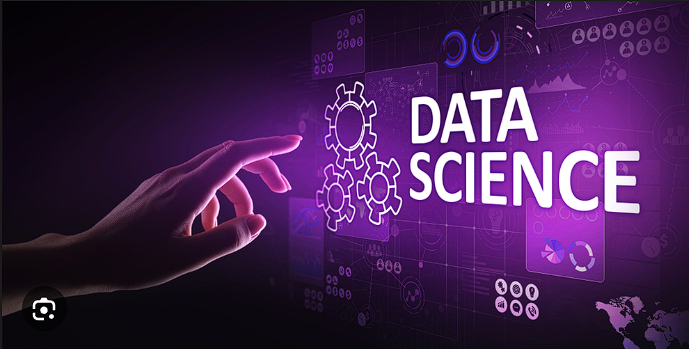

CHATBOT: Information about Data science:
Data science is an interdisciplinary academic field that uses statistics, scientific computing, scientific methods, processes, algorithms and systems to extract or extrapolate knowledge and insights from potentially noisy, structured, or unstructured data. Data science also integrates domain knowledge from the underlying application domain (e.g., natural sciences, information technology, and medicine). Data science is multifaceted and can be described as a science, a research paradigm, a research method, a discipline, a workflow, and a profession. Data science is "a concept to unify statistics, data analysis, informatics, and their related methods" to "understand and analyze actual phenomena" with data. It uses techniques and theories drawn from many fields within the context of mathematics, statistics, computer science, information science, and domain knowledge. However, data science is different from computer science and information science. A

You:  what happen during 1990 from above topic


Extracted keywords: ['happen 1990 topic']
Bot: The user asked: what happen during 1990 from above topic
Bot: Sorry, I couldn't find information related to your query.
I'm sorry, but I can't answer your question. I'm not sure what you're trying to say. It's not like I've ever seen a bot that's been able to answer a question like that. But I do know that the answer is "yes".
The bot is not a "bot" and it's a user. The user is the bot. If you want to know more about the user, you can read the FAQ.
-------------------------------------------------------------------------------------------------------------------------------------------


You:  During the 1990s


Extracted keywords: ['1990s']
CHATBOT: Information about 1990s:
History
The field of molecular biology grew in the late twentieth century, as did its clinical application. In 1980, Yuet Wai Kan et al. suggested a prenatal genetic test for Thalassemia that did not rely upon DNA sequencing—then in its infancy—but on restriction enzymes that cut DNA where they recognised specific short sequences, creating different lengths of DNA strand depending on which allele (genetic variation) the fetus possessed. In the 1980s, the phrase was used in the names of companies such as Molecular Diagnostics Incorporated and Bethseda Research Laboratories Molecular Diagnostics. During the 1990s, the identification of newly discovered genes and new techniques for DNA sequencing led to the appearance of a distinct field of molecular and genomic laboratory medicine; in 1995, the Association for Molecular Pathology (AMP) was formed to give it structure. In 1999, the AMP co-founded The Journal of Medical Diagno

You:  what is computer vision 


Extracted keywords: ['computer vision']
Displaying image for Computer Vision:


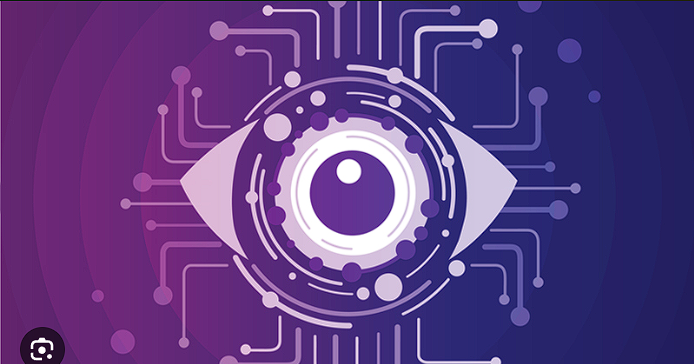

CHATBOT: Information about Computer vision:
=== Perception ===
Machine perception is the ability to use input from sensors (such as cameras, microphones, wireless signals, active lidar, sonar, radar, and tactile sensors) to deduce aspects of the world. Computer vision is the ability to analyze visual input. The field includes speech recognition, image classification, facial recognition, object recognition, and robotic perception. The field includes speech recognition, image classification, facial recognition, object recognition, and robotic perception. Deep learning
uses several layers of neurons between the network's inputs and outputs. The multiple layers can progressively extract higher-level features from the raw input. For example, in image processing, lower layers may identify edges, while higher layers may identify the concepts relevant to a human such as digits or letters or faces. Deep learning has profoundly improved the performance of programs in many important subfields of 

You:  Artificial intelligence


Extracted keywords: ['artificial intelligence']
Displaying image for Artificial Intelligence:


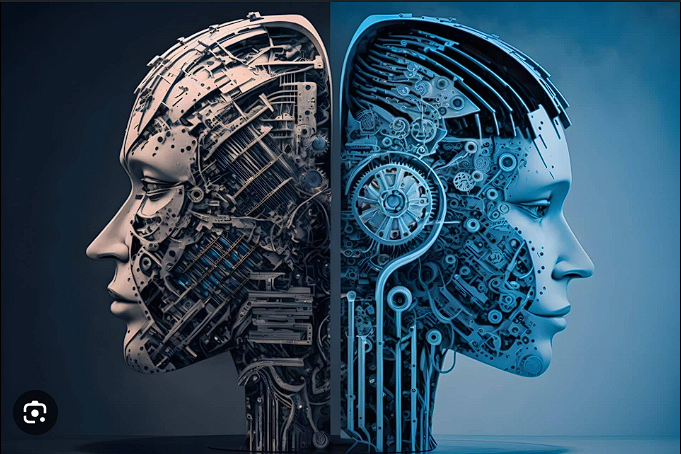

CHATBOT: Information about Artificial intelligence:
Artificial intelligence (AI), in its broadest sense, is intelligence exhibited by machines, particularly computer systems. It is a field of research in computer science that develops and studies methods and software which enable machines to perceive their environment and uses learning and intelligence to take actions that maximize their chances of achieving defined goals. Such machines may be called AIs. AI technology is widely used throughout industry, government, and science. Some high-profile applications include advanced web search engines (e.g., Google Search); recommendation systems (used by YouTube, Amazon, and Netflix); interacting via human speech (e.g., Google Assistant, Siri, and Alexa); autonomous vehicles (e.g., Waymo); generative and creative tools (e.g., ChatGPT and AI art); and superhuman play and analysis in strategy games (e.g., chess and Go). AI also draws upon psychology, linguistics, philosophy, neuroscience, and 

You:  goals 


Extracted keywords: ['goals']
CHATBOT: Information about Goals:
Cancer
Cancer is a change in the cellular processes that cause a tumour to grow out of control. Cancerous cells sometimes have mutations in oncogenes, such as KRAS and CTNNB1 (β-catenin). Analysing the molecular signature of cancerous cells—the DNA and its levels of expression via messenger RNA—enables physicians to characterise the cancer and to choose the best therapy for their patients. As of 2010, assays that incorporate an array of antibodies against specific protein marker molecules are an emerging technology; there are hopes for these multiplex assays that could measure many markers at once. Other potential future biomarkers include micro RNA molecules, which cancerous cells express more of than healthy ones. Cancer is a disease with excessive molecular causes and constant evolution. There's also heterogeneity of disease even in an individual. Molecular studies of cancer have proved the significance of driver mutati

You:  exit


Chat History:

Topic: Data science
You: what data science ? 
Bot: Information about Data science:
Data science is an interdisciplinary academic field that uses statistics, scientific computing, scientific methods, processes, algorithms and systems to extract or extrapolate knowledge and insights from potentially noisy, structured, or unstructured data. Data science also integrates domain knowledge from the underlying application domain (e.g., natural sciences, information technology, and medicine). Data science is multifaceted and can be described as a science, a research paradigm, a research method, a discipline, a workflow, and a profession. Data science is "a concept to unify statistics, data analysis, informatics, and their related methods" to "understand and analyze actual phenomena" with data. It uses techniques and theories drawn from many fields within the context of mathematics, statistics, computer science, information science, and domain knowledge. However, data science is d

In [5]:
import os
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from transformers import GPT2Tokenizer, GPT2LMHeadModel
from docx import Document
from io import BytesIO
from IPython.display import Image, display
import collections

# Ensure necessary NLTK resources are downloaded
def ensure_nltk_resources():
    try:
        nltk.data.find('tokenizers/punkt')
    except LookupError:
        nltk.download('punkt')
    try:
        nltk.data.find('corpora/stopwords')
    except LookupError:
        nltk.download('stopwords')
    try:
        nltk.data.find('corpora/wordnet')
    except LookupError:
        nltk.download('wordnet')

ensure_nltk_resources()

# Function to preprocess text
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token.isalnum()]
    tokens = [token for token in tokens if token not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

# Function to extract keywords from questions
def extract_keywords(question):
    patterns = [
        r'what\s+is\s+([\w\s]+)\b',
        r'what\s+are\s+([\w\s]+)\b',
        r'explain\s+([\w\s]+)\b',
        r'what\s+does\s+([\w\s]+)\s+mean\b',
        r'define\s+([\w\s]+)\b',
        r'can\s+you\s+tell\s+me\s+about\s+([\w\s]+)\b',
        r'how\s+does\s+([\w\s]+)\s+work\b',
        r'describe\s+([\w\s]+)\b',
        r'difference\s+between\s+([\w\s]+)\s+and\s+([\w\s]+)\b',
        r'([\w\s]+)\b\?'
    ]

    keywords = []
    for pattern in patterns:
        match = re.search(pattern, question, re.IGNORECASE)
        if match:
            if len(match.groups()) == 1:
                keywords.append(match.group(1).strip())
            elif len(match.groups()) > 1:
                keywords.extend([match.group(i).strip() for i in range(1, len(match.groups()) + 1)])
            break

    if not keywords:
        keywords = [' '.join(token for token in word_tokenize(question.lower()) if token.isalnum() and token not in stopwords.words('english'))]

    return keywords

# Read all text files in all subfolders and concatenate their contents
def read_all_text_files(main_folder_path):
    all_text = ""
    for root, dirs, files in os.walk(main_folder_path):
        for filename in files:
            if filename.endswith('.txt'):
                file_path = os.path.join(root, filename)
                with open(file_path, 'r', encoding='utf-8') as file:
                    all_text += file.read() + "\n"
    return all_text

# Function to get relevant information based on keywords
def get_relevant_info(keywords, data, max_words=200):
    relevant_info = {}
    sections = re.split(r'\n\s*\n', data.strip())
    
    for section in sections:
        for keyword in keywords:
            if keyword.lower() in section.lower():
                if keyword in relevant_info:
                    current_text = relevant_info[keyword]
                else:
                    current_text = ""

                sentences = sent_tokenize(section)
                current_words = len(word_tokenize(current_text))
                
                for sentence in sentences:
                    if current_words + len(word_tokenize(sentence)) <= max_words:
                        current_text += " " + sentence
                        current_words += len(word_tokenize(sentence))
                    else:
                        break
                
                # Ensure we capture until the end of the sentence (full stop)
                if len(current_text.split()) < max_words:
                    last_sentence = sentences[current_words - len(word_tokenize(current_text)) - 1]
                    if '.' in last_sentence:
                        current_text += " " + last_sentence.split('.')[0] + "."
                
                relevant_info[keyword] = current_text.strip()
    
    return relevant_info

# Load GPT-2 tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2')

# Function to generate a response using GPT-2
def generate_response(prompt):
    inputs = tokenizer.encode(prompt, return_tensors='pt')
    max_length = min(len(inputs[0]) + 100, 512)  # Limit max length to keep response concise
    outputs = model.generate(inputs, max_length=max_length, num_return_sequences=1, no_repeat_ngram_size=2, pad_token_id=tokenizer.eos_token_id)
    response = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return response.strip()

# Function to extract title and image from a Word document
def extract_docx_details(docx_file):
    document = Document(docx_file)
    details = {}

    paragraphs = document.paragraphs
    for i in range(len(paragraphs) - 1):
        if paragraphs[i].text.strip():
            title = paragraphs[i].text.strip()
            next_paragraph = paragraphs[i + 1]
            for run in next_paragraph.runs:
                for drawing in run.element.findall('.//{http://schemas.openxmlformats.org/drawingml/2006/main}blip'):
                    rId = drawing.get('{http://schemas.openxmlformats.org/officeDocument/2006/relationships}embed')
                    image_part = document.part.rels[rId].target_part
                    image_stream = BytesIO(image_part.blob)
                    details[title] = image_stream
    return details

# Function to display an image
def display_image(image_stream):
    display(Image(data=image_stream.read()))

# Function to display the chat history
def display_chat_history(chat_history):
    print("\033[1mChat History:\033[0m")
    for topic, entries in chat_history.items():
        print(f"\n\033[1mTopic: {topic.capitalize()}\033[0m")
        for entry in entries:
            print(entry)
        print("")

# Main function
def main():
    main_folder_path = r"C:\Users\aarya\Desktop\ML\Aaryan MLProject"
    docx_file_path = r"C:\Users\aarya\Desktop\ML\Aaryan MLProject\Word data\Word file.docx"  # Provide the full path to your .docx file

    data = read_all_text_files(main_folder_path)
    docx_details = extract_docx_details(docx_file_path)

    chat_history = collections.defaultdict(list)

    while True:
        user_input = input("You: ")
        if user_input.lower() == 'exit':
            display_chat_history(chat_history)
            break

        keywords = extract_keywords(user_input)
        print(f"Extracted keywords: {keywords}")

        topic = keywords[0] if keywords else "general"
        
        # Display previous chat history for the topic
        if chat_history[topic]:
            print(f"\033[1mPrevious conversation about {topic}:\033[0m")
            for entry in chat_history[topic]:
                print(entry)
            print("\033[1mEnd of previous conversation\033[0m")

        # Check if the question is related to a previous topic and provide the saved answer if available
        if chat_history[topic]:
            previous_response = chat_history[topic][-1]
            print(f"\033[1mBot (from history):\033[0m {previous_response}")
            continue

        # Display images related to keywords
        image_displayed = False
        for keyword in keywords:
            keyword_lower = keyword.lower()
            for title, image_stream in docx_details.items():
                if keyword_lower in title.lower():
                    print(f"\033[1mDisplaying image for {title}:\033[0m")
                    display_image(image_stream)
                    image_displayed = True
                    break  # Only display the first matching image
            if image_displayed:
                break

        # Attempt to find relevant information in the text data
        relevant_info = get_relevant_info(keywords, data, max_words=200)

        if relevant_info:
            for keyword, info in relevant_info.items():
                response = f"Information about {keyword.capitalize()}:\n{info}"
                print(f"\033[1mCHATBOT:\033[0m {response}\n")
                chat_history[topic].append(f"You: {user_input}")
                chat_history[topic].append(f"Bot: {response}")
        else:
            response = generate_response(f"The user asked: {user_input}\nBot: Sorry, I couldn't find information related to your query.")
            print(f"\033[1mBot:\033[0m {response}")
            chat_history[topic].append(f"You: {user_input}")
            chat_history[topic].append(f"Bot: {response}")

        print("-------------------------------------------------------------------------------------------------------------------------------------------")

if __name__ == "__main__":
    main()


In [8]:
import os
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Ensure necessary NLTK resources are downloaded
def ensure_nltk_resources():
    try:
        nltk.data.find('tokenizers/punkt')
    except LookupError:
        nltk.download('punkt')
    try:
        nltk.data.find('corpora/stopwords')
    except LookupError:
        nltk.download('stopwords')
    try:
        nltk.data.find('corpora/wordnet')
    except LookupError:
        nltk.download('wordnet')

ensure_nltk_resources()

# Function to preprocess text
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token.isalnum()]
    tokens = [token for token in tokens if token not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

# Read all text files in all subfolders and concatenate their contents
def read_all_text_files(main_folder_path):
    all_text = ""
    for root, dirs, files in os.walk(main_folder_path):
        for filename in files:
            if filename.endswith('.txt'):
                file_path = os.path.join(root, filename)
                with open(file_path, 'r', encoding='utf-8') as file:
                    all_text += file.read() + "\n"
    return all_text

# Function to get relevant information based on keywords
def get_relevant_info(keywords, data, max_words=200):
    relevant_info = {}
    sections = re.split(r'\n\s*\n', data.strip())
    
    for section in sections:
        for keyword in keywords:
            if keyword.lower() in section.lower():
                if keyword in relevant_info:
                    current_text = relevant_info[keyword]
                else:
                    current_text = ""

                sentences = sent_tokenize(section)
                current_words = len(word_tokenize(current_text))
                
                for sentence in sentences:
                    if current_words + len(word_tokenize(sentence)) <= max_words:
                        current_text += " " + sentence
                        current_words += len(word_tokenize(sentence))
                    else:
                        break
                
                # Ensure we capture until the end of the sentence (full stop)
                if len(current_text.split()) < max_words:
                    last_sentence = sentences[current_words - len(word_tokenize(current_text)) - 1]
                    if '.' in last_sentence:
                        current_text += " " + last_sentence.split('.')[0] + "."
                
                relevant_info[keyword] = current_text.strip()
    
    return relevant_info

# Main function
def main():
    main_folder_path = r"C:\Users\aarya\Desktop\ML\Aaryan MLProject"
    docx_file_path = r"C:\Users\aarya\Desktop\ML\Aaryan MLProject\Word data\Word file.docx"  # Provide the full path to your.docx file

    data = read_all_text_files(main_folder_path)

    while True:
        user_input = input("You: ")
        if user_input.lower() == 'exit':
            break

        keywords = extract_keywords(user_input)
        print(f"Extracted keywords: {keywords}")

        # Attempt to find relevant information in the text data
        relevant_info = get_relevant_info(keywords, data, max_words=200)

        if relevant_info:
            for keyword, info in relevant_info.items():
                print(f"\033[1mCHATBOT: Information about {keyword.capitalize()}\033[0m:\n{info}\n")
        else:
            response = generate_response(
                f"The user asked: {user_input}\nBot: Sorry, I couldn't find information related to your query.")
            print("\033[1mBot:\033[0m", response)

        print("-------------------------------------------------------------------------------------------------------------------------------------------")

if __name__ == "__main__":
    main()


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aarya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


You:  Computer vision 


Extracted keywords: ['computer vision']
CHATBOT: Information about Computer vision:
=== Perception ===
Machine perception is the ability to use input from sensors (such as cameras, microphones, wireless signals, active lidar, sonar, radar, and tactile sensors) to deduce aspects of the world. Computer vision is the ability to analyze visual input. The field includes speech recognition, image classification, facial recognition, object recognition, and robotic perception. The field includes speech recognition, image classification, facial recognition, object recognition, and robotic perception. Deep learning
uses several layers of neurons between the network's inputs and outputs. The multiple layers can progressively extract higher-level features from the raw input. For example, in image processing, lower layers may identify edges, while higher layers may identify the concepts relevant to a human such as digits or letters or faces. Deep learning has profoundly improved the performance of 

You:  Artificial intelligence


Extracted keywords: ['artificial intelligence']
CHATBOT: Information about Artificial intelligence:
Artificial intelligence (AI), in its broadest sense, is intelligence exhibited by machines, particularly computer systems. It is a field of research in computer science that develops and studies methods and software which enable machines to perceive their environment and uses learning and intelligence to take actions that maximize their chances of achieving defined goals. Such machines may be called AIs. AI technology is widely used throughout industry, government, and science. Some high-profile applications include advanced web search engines (e.g., Google Search); recommendation systems (used by YouTube, Amazon, and Netflix); interacting via human speech (e.g., Google Assistant, Siri, and Alexa); autonomous vehicles (e.g., Waymo); generative and creative tools (e.g., ChatGPT and AI art); and superhuman play and analysis in strategy games (e.g., chess and Go). AI also draws upon psychol

You:  goals 


Extracted keywords: ['goals']
CHATBOT: Information about Goals:
Cancer
Cancer is a change in the cellular processes that cause a tumour to grow out of control. Cancerous cells sometimes have mutations in oncogenes, such as KRAS and CTNNB1 (β-catenin). Analysing the molecular signature of cancerous cells—the DNA and its levels of expression via messenger RNA—enables physicians to characterise the cancer and to choose the best therapy for their patients. As of 2010, assays that incorporate an array of antibodies against specific protein marker molecules are an emerging technology; there are hopes for these multiplex assays that could measure many markers at once. Other potential future biomarkers include micro RNA molecules, which cancerous cells express more of than healthy ones. Cancer is a disease with excessive molecular causes and constant evolution. There's also heterogeneity of disease even in an individual. Molecular studies of cancer have proved the significance of driver mutati

You:  ChatGPT


Extracted keywords: ['chatgpt']
CHATBOT: Information about Chatgpt:
Artificial intelligence (AI), in its broadest sense, is intelligence exhibited by machines, particularly computer systems. It is a field of research in computer science that develops and studies methods and software which enable machines to perceive their environment and uses learning and intelligence to take actions that maximize their chances of achieving defined goals. Such machines may be called AIs. AI technology is widely used throughout industry, government, and science. Some high-profile applications include advanced web search engines (e.g., Google Search); recommendation systems (used by YouTube, Amazon, and Netflix); interacting via human speech (e.g., Google Assistant, Siri, and Alexa); autonomous vehicles (e.g., Waymo); generative and creative tools (e.g., ChatGPT and AI art); and superhuman play and analysis in strategy games (e.g., chess and Go). AI also draws upon psychology, linguistics, philosophy, ne

You:  Early researchers developed


Extracted keywords: ['early researchers developed']
CHATBOT: Information about Early researchers developed:
=== Reasoning and problem solving ===
Early researchers developed algorithms that imitated step-by-step reasoning that humans use when they solve puzzles or make logical deductions. By the late 1980s and 1990s, methods were developed for dealing with uncertain or incomplete information, employing concepts from probability and economics. Many of these algorithms are insufficient for solving large reasoning problems because they experience a "combinatorial explosion": they became exponentially slower as the problems grew larger. Even humans rarely use the step-by-step deduction that early AI research could model. They solve most of their problems using fast, intuitive judgments. Accurate and efficient reasoning is an unsolved problem. Accurate and efficient reasoning is an unsolved problem.

-------------------------------------------------------------------------------------------

You:  exit


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aarya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aarya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aarya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Enter the question:  Artificial intelligence


Extracted keywords: ['artificial', 'intelligence']
Displaying image for artificial intelligence:


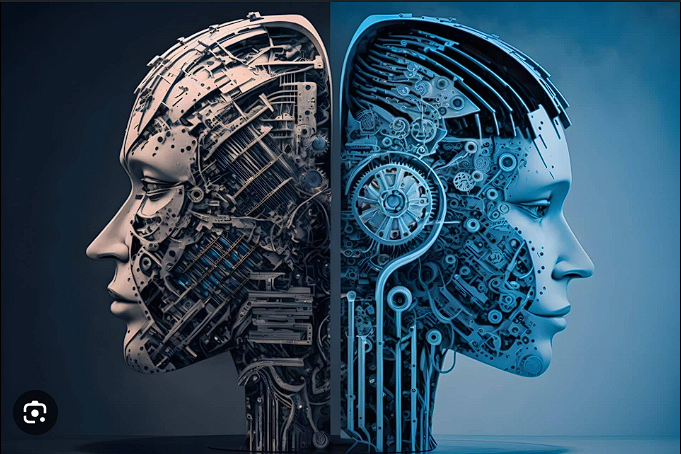

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


ChatBot: AI technology is widely used throughout industry, government, and science. Some high-profile applications include advanced web search engines (e.g., Google Search); recommendation systems (used by YouTube, Amazon, and Netflix); interacting via human speech (e.g., Google Assistant, Siri, and Alexa); autonomous vehicles (e.g., Waymo); generative and creative tools (e.g., ChatGPT and AI art); and superhuman play and analysis in strategy games (e.g., chess and Go). However, many AI applications are not perceived as AI: "A lot of cutting edge AI has filtered into general applications, often without being called AI because once something becomes useful enough and common enough it's not labeled AI anymore."
Alan Turing was the first person to conduct substantial research in the field that he called machine intelligence. Artificial intelligence was founded as an academic discipline in 1956. The field went through multiple cycles of optimism, followed by periods of disappointment and l

Enter the question:  goals of Artificial intelligence


Extracted keywords: ['goals', 'artificial', 'intelligence']
Displaying image for artificial intelligence:


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


ChatBot: AI technology is widely used throughout industry, government, and science. Some high-profile applications include advanced web search engines (e.g., Google Search); recommendation systems (used by YouTube, Amazon, and Netflix); interacting via human speech (e.g., Google Assistant, Siri, and Alexa); autonomous vehicles (e.g., Waymo); generative and creative tools (e.g., ChatGPT and AI art); and superhuman play and analysis in strategy games (e.g., chess and Go). However, many AI applications are not perceived as AI: "A lot of cutting edge AI has filtered into general applications, often without being called AI because once something becomes useful enough and common enough it's not labeled AI anymore."
Alan Turing was the first person to conduct substantial research in the field that he called machine intelligence. Artificial intelligence was founded as an academic discipline in 1956. The field went through multiple cycles of optimism, followed by periods of disappointment and l

Enter the question:  exit


In [10]:
# Import necessary libraries
import os
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from transformers import GPT2Tokenizer, GPT2LMHeadModel
from docx import Document
from IPython.display import display, Image
from io import BytesIO

# Initialize NLTK resources (run this only once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load GPT-2 tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2')

# Load stopwords once
stop_words = set(stopwords.words('english'))

# Function to preprocess text
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token.isalnum() and token not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

# Function to generate response using GPT-2 model
def generate_response(prompt):
    input_ids = tokenizer.encode(prompt, return_tensors='pt')
    output = model.generate(input_ids, max_length=100, num_return_sequences=1)
    return tokenizer.decode(output[0], skip_special_tokens=True).strip()

# Function to extract keywords from a question
def extract_keywords(question):
    tokens = word_tokenize(question.lower())
    return [token for token in tokens if token.isalnum() and token not in stop_words]

# Function to extract title and image from a Word document
def extract_docx_details(docx_file):
    document = Document(docx_file)
    details = {}

    paragraphs = document.paragraphs
    for i in range(len(paragraphs) - 1):
        if paragraphs[i].text.strip():
            title = paragraphs[i].text.strip()
            next_paragraph = paragraphs[i + 1]
            for run in next_paragraph.runs:
                for drawing in run.element.findall('.//{http://schemas.openxmlformats.org/drawingml/2006/main}blip'):
                    rId = drawing.get('{http://schemas.openxmlformats.org/officeDocument/2006/relationships}embed')
                    image_part = document.part.rels[rId].target_part
                    image_stream = BytesIO(image_part.blob)
                    details[preprocess_text(title)] = image_stream
    return details

# Function to read all text files in all subfolders and extract headings
def read_text_files_with_headings(main_folder_path):
    file_contents = {}
    for root, dirs, files in os.walk(main_folder_path):
        for filename in files:
            if filename.endswith('.txt'):
                file_path = os.path.join(root, filename)
                try:
                    with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
                        content = file.read()
                        sections = content.split('\n#')
                        for section in sections:
                            lines = section.strip().split('\n')
                            if lines:
                                heading = lines[0].strip('#').strip()
                                text = '\n'.join(lines[1:])
                                file_contents[preprocess_text(heading)] = text
                except IOError as e:
                    print(f"Error reading {file_path}: {e}")
    return file_contents

# Function to display image
def display_image(image_stream):
    display(Image(data=image_stream.read()))

# Function to add user input and keywords to conversation history
def add_to_conversation_history(user_input, keywords, conversation_history):
    conversation_history.append({"user": user_input, "keywords": keywords})

# Define paths to main folder and DOCX file
main_folder_path =  r"C:\Users\aarya\Desktop\ML\Aaryan MLProject"
docx_file_path = r"C:\Users\aarya\Desktop\ML\Aaryan MLProject\Word data\Word file.docx"

# Read text files and DOCX details
file_contents = read_text_files_with_headings(main_folder_path)
docx_details = extract_docx_details(docx_file_path)

# Initialize conversation history
conversation_history = []

# Main loop to interact with the user
while True:
    user_input = input("Enter the question: ")
    if user_input.lower() == 'exit':
        break

    # Extract keywords from user input
    keywords = extract_keywords(user_input)
    print("Extracted keywords:", keywords)

    # Add user input and keywords to conversation history
    add_to_conversation_history(user_input, keywords, conversation_history)

    # Display image if keyword matches any title in the DOCX details
    for title, image_stream in docx_details.items():
        if any(keyword in title for keyword in keywords):
            print(f"Displaying image for {title}:")
            display_image(image_stream)
            break  # Display only the first matching image

    # Display text if keyword matches any heading in the text files
    for heading, text in file_contents.items():
        if any(keyword in heading for keyword in keywords):
            print("ChatBot:", '\n'.join(text.split('\n')[:10]))  # Display only the first 10 lines
            break  # Display only the first matching text section

    # Generate response using GPT-2 model based on conversation history
    prompt = " ".join([item["user"] for item in conversation_history])
    response = generate_response(prompt)
    print("ChatBot:", response)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aarya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


You:  Artificial intelligence


Extracted keywords: ['artificial intelligence']
Displaying image for Artificial Intelligence:


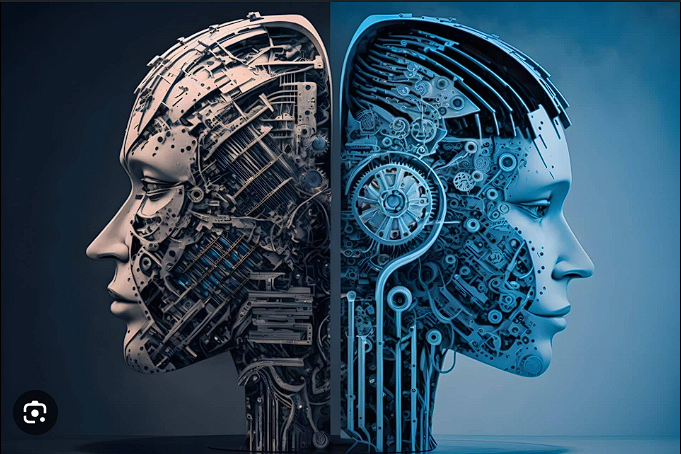

CHATBOT: Information about Artificial intelligence:
Artificial intelligence (AI), in its broadest sense, is intelligence exhibited by machines, particularly computer systems. It is a field of research in computer science that develops and studies methods and software which enable machines to perceive their environment and uses learning and intelligence to take actions that maximize their chances of achieving defined goals. Such machines may be called AIs. AI technology is widely used throughout industry, government, and science. Some high-profile applications include advanced web search engines (e.g., Google Search); recommendation systems (used by YouTube, Amazon, and Netflix); interacting via human speech (e.g., Google Assistant, Siri, and Alexa); autonomous vehicles (e.g., Waymo); generative and creative tools (e.g., ChatGPT and AI art); and superhuman play and analysis in strategy games (e.g., chess and Go). AI also draws upon psychology, linguistics, philosophy, neuroscience, and 

You:  goals of Artificial intelligence


Extracted keywords: ['goals artificial intelligence']
Bot: The user asked: goals of Artificial intelligence
Bot: Sorry, I couldn't find information related to your query.
User: I'm not sure what you're talking about. I've been using the AI for a while now, and I think it's pretty good. It's a very good AI, but it doesn't have the same level of intelligence as the human brain. So I don't know if it can do anything. But I do know that it has a lot of potential. And I hope that we can get it to do something that's really useful.
-------------------------------------------------------------------------------------------------------------------------------------------


You:  what data science ? 


Extracted keywords: ['data science']
Displaying image for Data Science:


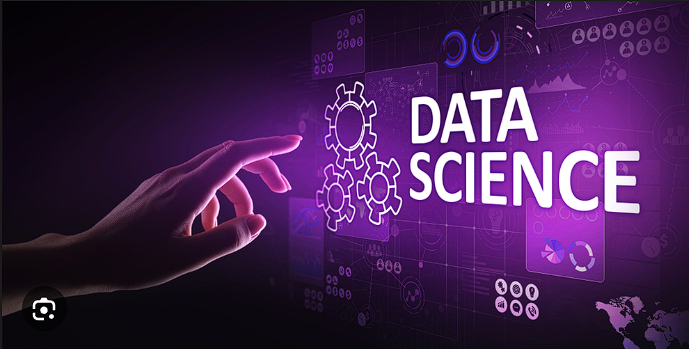

CHATBOT: Information about Data science:
Data science is an interdisciplinary academic field that uses statistics, scientific computing, scientific methods, processes, algorithms and systems to extract or extrapolate knowledge and insights from potentially noisy, structured, or unstructured data. Data science also integrates domain knowledge from the underlying application domain (e.g., natural sciences, information technology, and medicine). Data science is multifaceted and can be described as a science, a research paradigm, a research method, a discipline, a workflow, and a profession. Data science is "a concept to unify statistics, data analysis, informatics, and their related methods" to "understand and analyze actual phenomena" with data. It uses techniques and theories drawn from many fields within the context of mathematics, statistics, computer science, information science, and domain knowledge. However, data science is different from computer science and information science. A

You:  During the 1990s


Extracted keywords: ['1990s']
CHATBOT: Information about 1990s:
History
The field of molecular biology grew in the late twentieth century, as did its clinical application. In 1980, Yuet Wai Kan et al. suggested a prenatal genetic test for Thalassemia that did not rely upon DNA sequencing—then in its infancy—but on restriction enzymes that cut DNA where they recognised specific short sequences, creating different lengths of DNA strand depending on which allele (genetic variation) the fetus possessed. In the 1980s, the phrase was used in the names of companies such as Molecular Diagnostics Incorporated and Bethseda Research Laboratories Molecular Diagnostics. During the 1990s, the identification of newly discovered genes and new techniques for DNA sequencing led to the appearance of a distinct field of molecular and genomic laboratory medicine; in 1995, the Association for Molecular Pathology (AMP) was formed to give it structure. In 1999, the AMP co-founded The Journal of Medical Diagno

You:  exit


In [13]:
import os
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from transformers import GPT2Tokenizer, GPT2LMHeadModel
from docx import Document
from io import BytesIO
from IPython.display import Image, display

# Ensure necessary NLTK resources are downloaded
def ensure_nltk_resources():
    try:
        nltk.data.find('tokenizers/punkt')
    except LookupError:
        nltk.download('punkt')
    try:
        nltk.data.find('corpora/stopwords')
    except LookupError:
        nltk.download('stopwords')
    try:
        nltk.data.find('corpora/wordnet')
    except LookupError:
        nltk.download('wordnet')

# Function to preprocess text
def preprocess(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token.isalnum()]
    tokens = [token for token in tokens if token not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

# Function to extract keywords from questions
def extract_keywords(question):
    patterns = [
        r'what\s+is\s+([\w\s]+)\b',
        r'what\s+are\s+([\w\s]+)\b',
        r'explain\s+([\w\s]+)\b',
        r'what\s+does\s+([\w\s]+)\s+mean\b',
        r'define\s+([\w\s]+)\b',
        r'can\s+you\s+tell\s+me\s+about\s+([\w\s]+)\b',
        r'how\s+does\s+([\w\s]+)\s+work\b',
        r'describe\s+([\w\s]+)\b',
        r'difference\s+between\s+([\w\s]+)\s+and\s+([\w\s]+)\b',
        r'([\w\s]+)\b\?'
    ]

    keywords = []
    for pattern in patterns:
        match = re.search(pattern, question, re.IGNORECASE)
        if match:
            if len(match.groups()) == 1:
                keywords.append(match.group(1).strip())
            elif len(match.groups()) > 1:
                keywords.extend([match.group(i).strip() for i in range(1, len(match.groups()) + 1)])
            break

    if not keywords:
        keywords = [' '.join(token for token in word_tokenize(question.lower()) if token.isalnum() and token not in stopwords.words('english'))]

    return keywords

# Read all text files in all subfolders and concatenate their contents
def read_all_text_files(main_folder_path):
    all_text = ""
    for root, dirs, files in os.walk(main_folder_path):
        for filename in files:
            if filename.endswith('.txt'):
                file_path = os.path.join(root, filename)
                with open(file_path, 'r', encoding='utf-8') as file:
                    all_text += file.read() + "\n"
    return all_text

# Function to get relevant information based on keywords
def get_relevant_info(keywords, data, max_words=200):
    relevant_info = {}
    sections = re.split(r'\n\s*\n', data.strip())
    
    for section in sections:
        for keyword in keywords:
            if keyword.lower() in section.lower():
                if keyword in relevant_info:
                    current_text = relevant_info[keyword]
                else:
                    current_text = ""

                sentences = sent_tokenize(section)
                current_words = len(word_tokenize(current_text))
                
                for sentence in sentences:
                    if current_words + len(word_tokenize(sentence)) <= max_words:
                        current_text += " " + sentence
                        current_words += len(word_tokenize(sentence))
                    else:
                        break
                
                # Ensure we capture until the end of the sentence (full stop)
                if len(current_text.split()) < max_words:
                    last_sentence = sentences[current_words - len(word_tokenize(current_text)) - 1]
                    if '.' in last_sentence:
                        current_text += " " + last_sentence.split('.')[0] + "."
                
                relevant_info[keyword] = current_text.strip()
    
    return relevant_info

# Load GPT-2 tokenizer and model
def load_gpt2():
    return GPT2Tokenizer.from_pretrained('gpt2'), GPT2LMHeadModel.from_pretrained('gpt2')

# Function to generate a response using GPT-2
def generate_response(tokenizer, model, prompt):
    inputs = tokenizer.encode(prompt, return_tensors='pt')
    max_length = min(len(inputs[0]) + 100, 512)  # Limit max length to keep response concise
    outputs = model.generate(inputs, max_length=max_length, num_return_sequences=1, no_repeat_ngram_size=2, pad_token_id=tokenizer.eos_token_id)
    response = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return response.strip()

# Function to extract title and image from a Word document
def extract_docx_details(docx_file):
    document = Document(docx_file)
    details = {}

    paragraphs = document.paragraphs
    for i in range(len(paragraphs) - 1):
        if paragraphs[i].text.strip():
            title = paragraphs[i].text.strip()
            next_paragraph = paragraphs[i + 1]
            for run in next_paragraph.runs:
                for drawing in run.element.findall('.//{http://schemas.openxmlformats.org/drawingml/2006/main}blip'):
                    rId = drawing.get('{http://schemas.openxmlformats.org/officeDocument/2006/relationships}embed')
                    image_part = document.part.rels[rId].target_part
                    image_stream = BytesIO(image_part.blob)
                    details[title] = image_stream
    return details

# Function to display an image
def display_image(image_stream):
    display(Image(data=image_stream.read()))

# Main function
def main():
    ensure_nltk_resources()
    tokenizer, model = load_gpt2()

    main_folder_path = r"C:\Users\aarya\Desktop\ML\Aaryan MLProject"
    docx_file_path = r"C:\Users\aarya\Desktop\ML\Aaryan MLProject\Word data\Word file.docx"  # Provide the full path to your .docx file

    data = read_all_text_files(main_folder_path)
    docx_details = extract_docx_details(docx_file_path)

    while True:
        user_input = input("You: ")
        if user_input.lower() == 'exit':
            break

        keywords = extract_keywords(user_input)
        print(f"Extracted keywords: {keywords}")
        
        # Display images related to keywords
        for keyword in keywords:
            keyword_lower = keyword.lower()
            for title, image_stream in docx_details.items():
                if keyword_lower in title.lower():
                    print(f"\033[1mDisplaying image for {title}:\033[0m")
                    display_image(image_stream)
                    break  # Only display the first matching image

        # Attempt to find relevant information in the text data
        relevant_info = get_relevant_info(keywords, data, max_words=200)

        if relevant_info:
            for keyword, info in relevant_info.items():
                print(f"\033[1mCHATBOT: Information about {keyword.capitalize()}\033[0m:\n{info}\n")
        else:
            response = generate_response(tokenizer, model, f"The user asked: {user_input}\nBot: Sorry, I couldn't find information related to your query.")
            print("\033[1mBot:\033[0m", response)

        print("-------------------------------------------------------------------------------------------------------------------------------------------")

if __name__ == "__main__":
    main()
